In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 导入数据集

该数据集为巴西政府公布的自1997至2018年年亚马逊雨林发送火灾的情况，其中各列所代表的的含义为：
- year：发生火灾的年份
- state：发生火灾的州
- month：发生火灾的月份（葡萄牙语）
- number：火灾发生的次数
- date：报道日期

In [5]:
data = pd.read_csv('./files/amazon.csv', encoding='windows-1252')
data.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


### 统计各个州的火灾率

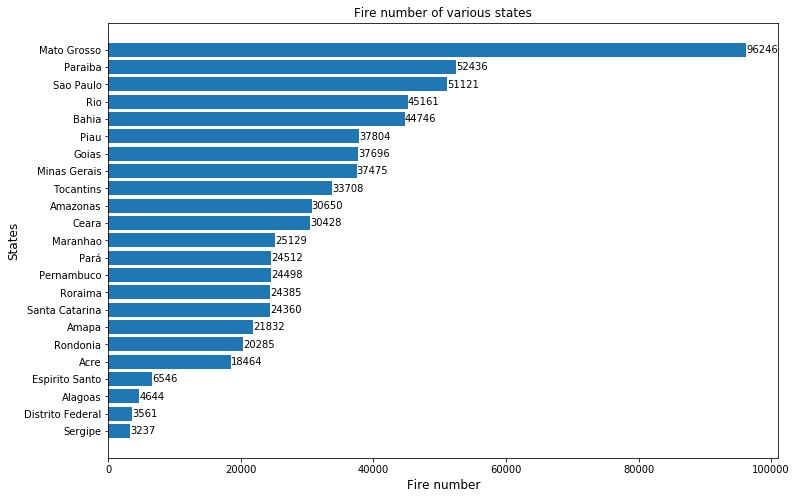

In [91]:
# 按数量统计
number_state = data.groupby('state').sum()['number']
number_state = number_state.copy()
number_state.sort_values(ascending=True, inplace=True)

plt.figure(figsize=(12, 8))
plt.barh(number_state.index ,number_state.values)
plt.title('Fire number of various states', fontsize='large')
plt.xlabel('Fire number', fontsize='large')
plt.ylabel('States', fontsize='large')

# 添加数据标签
for a, b in number_state.items():
    plt.text(b, a, '%.0f' % b, va='center')

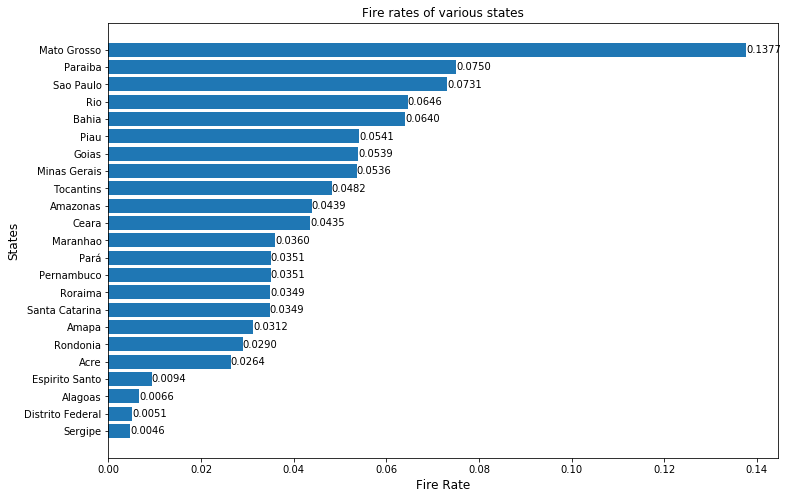

In [96]:
# 按火灾率统计
number_state_rate = number_state / sum(number_state)
number_state_rate.sort_values(ascending=True, inplace=True)

plt.figure(figsize=(12, 8))
plt.barh(number_state_rate.index ,number_state_rate.values)
plt.title('Fire rates of various states', fontsize='large')
plt.xlabel('Fire Rate', fontsize='large')
plt.ylabel('States', fontsize='large')

# 添加数据标签
for a, b in number_state_rate.items():
    plt.text(b, a, '%.4f' % b, va='center')

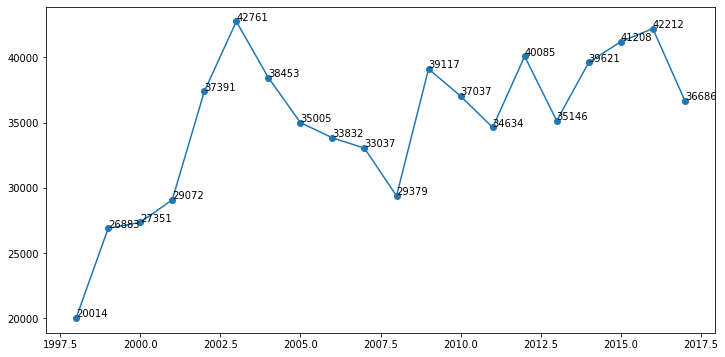

In [98]:
number_year = data.groupby('year').sum()['number']
plt.figure(figsize=(12, 6))
plt.plot(number_year.index, number_year.values, marker='o')

# 添加数据标签
for a, b in number_year.items():
    plt.text(a, b+100, '%.0f' % b, fontsize=10)